<a href="https://colab.research.google.com/github/EduMG02/Fenomenos-Bioelectricos/blob/main/Lab_1_JEMG_2077981.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Simulacion del potencial de GHK en lenguaje simbolico matematico

### **Alumno:** Jorge Eduardo Muñoz Garza
### **Matrícula:** 2077981

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.



Tabla 1 de valores de concentracion.

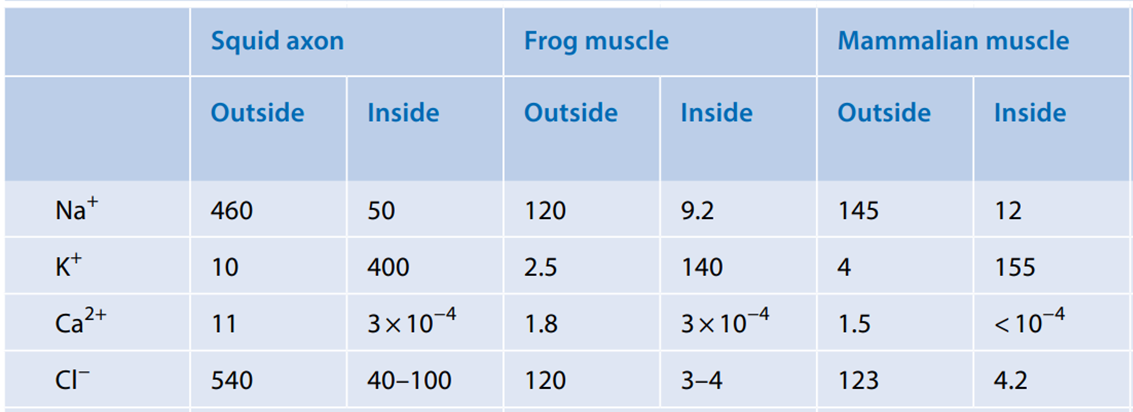

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [1]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [2]:
from sympy import Symbol
from sympy import log

**Ejemplo**

Definicion de variables simples y de metodo de representacion

In [3]:
x = Symbol('x')
x

x

In [4]:
y = Symbol('y')
y

y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [5]:
z = 3*x+y
z

3*x + y

In [6]:
z.subs({x:5,y:3})

18

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [7]:
R = Symbol('R') # Gases ideales
T = Symbol('T') # Temperatura absoluta
F = Symbol('F') # Faraday

display(R, T, F)

R

T

F

Definicion de variables para calcular el potencial de Nernst del K

In [8]:
K_in = Symbol('K_i')
K_out = Symbol('K_o')
K_z = Symbol('K_z')

display(K_in, K_out, K_z)

K_i

K_o

K_z

Definicion de la funcion del potencial de Nernst del K

In [9]:
V_K = -((R*T/(K_z*F)))*log(K_in/K_out)
V_K

-R*T*log(K_i/K_o)/(F*K_z)

Asignacion de valores numericos a las variables de concentracion de K

In [10]:
V_K.subs({F:96485.3383, T:310, R:8.314, K_in:140, K_out:2.5, K_z:1}) #  x:3,y:1


-0.107526180758588

##Potencial de Nernst del Sodio

In [11]:
Na_in = Symbol('Na_i')
Na_out = Symbol('Na_o')
Na_z = Symbol('Na_z')

display(Na_in, Na_out, Na_z)

Na_i

Na_o

Na_z

In [12]:
V_Na = -((R*T/(Na_z*F)))*log(Na_in/Na_out)
V_Na

-R*T*log(Na_i/Na_o)/(F*Na_z)

In [13]:
V_Na.subs({F:96485.3383, T:310, R:8.314, Na_in:9.2, Na_out:120, Na_z:1})


0.0686047453154608

##Potencial de Nernst del Cloro

In [14]:
Cl_in = Symbol('Cl_i')
Cl_out = Symbol('Cl_o')
Cl_z = Symbol('Cl_z')

display(Cl_in, Cl_out, Cl_z)

Cl_i

Cl_o

Cl_z

In [15]:
V_Cl = -((R*T/(Cl_z*F)))*(log(Cl_in/Cl_out))
V_Cl

-R*T*log(Cl_i/Cl_o)/(Cl_z*F)

In [16]:
V_Cl.subs({F:96485.3383, T:310, R:8.314, Cl_in:4, Cl_out:120, Cl_z:-1}).evalf()


-0.0908536179082158

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



##Calamar

In [17]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de calamar
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')

display(P_Na, P_K, P_Cl)


P_Na

P_K

P_Cl

In [18]:
# Integre las variables definiadas en la funcion de GHK
V_axon_calamar = (R*T/F)*(log((P_Na*Na_out+P_K*K_out+P_Cl*Cl_in)/(P_Na*Na_in+P_K*K_in+P_Cl*Cl_out)))
V_axon_calamar

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [19]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_calamar.subs({F:96485.3383, T:310, R:8.314, P_Na:0.04, P_K:1, P_Cl:0.45, K_in:400, K_out:10, Na_in:50, Na_out:460, Cl_in:100, Cl_out:540})

-0.0580544268585350

##Rana

In [20]:
# Integre las variables definiadas en la funcion de GHK
V_musculo_rana = (R*T/F)*(log((P_Na*Na_out+P_K*K_out+P_Cl*Cl_in)/(P_Na*Na_in+P_K*K_in+P_Cl*Cl_out)))
V_musculo_rana

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [21]:
V_musculo_rana.subs({F:96485.3383, T:310, R:8.314, P_Na:2*(10**(-8)), P_K:2*(10**(-6)), P_Cl:4*(10**(-6)), K_in:140, K_out:2.5, Na_in:9.2, Na_out:120, Cl_in:4, Cl_out:120}).evalf()


-0.0929806366550087

##Mamífero

In [22]:
# Integre las variables definiadas en la funcion de GHK
V_musculo_mamifero = (R*T/F)*(log((P_Na*Na_out+P_K*K_out+P_Cl*Cl_in)/(P_Na*Na_in+P_K*K_in+P_Cl*Cl_out)))
V_musculo_mamifero

R*T*log((Cl_i*P_Cl + K_o*P_K + Na_o*P_Na)/(Cl_o*P_Cl + K_i*P_K + Na_i*P_Na))/F

In [23]:
V_musculo_mamifero.subs({F:96485.3383, T:310, R:8.314, P_Na:0.04, P_K:1, P_Cl:0.45, K_in:155, K_out:4, Na_in:12, Na_out:145, Cl_in:4.2, Cl_out:123})



-0.0772603164101997

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

In [24]:
V_Na

-R*T*log(Na_i/Na_o)/(F*Na_z)

In [25]:
ENa = V_Na.subs({F:96485.3383, T:310, R:8.314, Na_in:50, Na_out:460, Na_z:1})

In [26]:
print(ENa)

-0.0267122450458361*log(5/46)


In [27]:
import numpy as np
import matplotlib.pyplot as plt


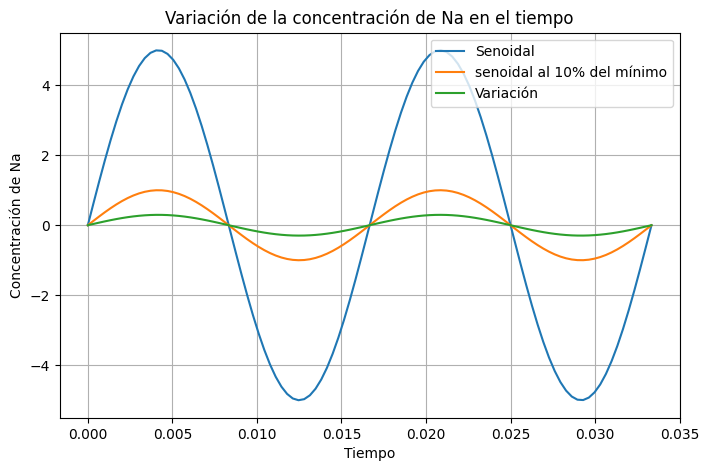

In [28]:
f = 60  # Hz
T = 1 / f  # periodo
t = np.linspace(0, 2*T, 100)

# Variación sinoidal del 10% del valor mínimo de concentración iónica
min = 50  # valor mínimo
var = 0.1 * min  # variación del 10%
Sen = np.sin(2 * np.pi * f * t )
Vin = var * Sen
VNa = ENa * Vin

plt.figure(figsize=(8, 5))

plt.plot(t, Vin, label='Senoidal') # Estan volteadas porque se imprimen mal los label
plt.plot(t, Sen, label='senoidal al 10% del mínimo')
plt.plot(t, VNa, label='Variación')

# Configuraciones de la gráfica
plt.xlabel('Tiempo')
plt.ylabel('Concentración de Na')
plt.title('Variación de la concentración de Na en el tiempo')
plt.legend()
plt.grid(True)
plt.show()

Me da más sentido la gráfica con la onda senoidal que acabamos de observar pero por si acaso agrego tambien la gráfica que utiliza sin(2pit*f/T)

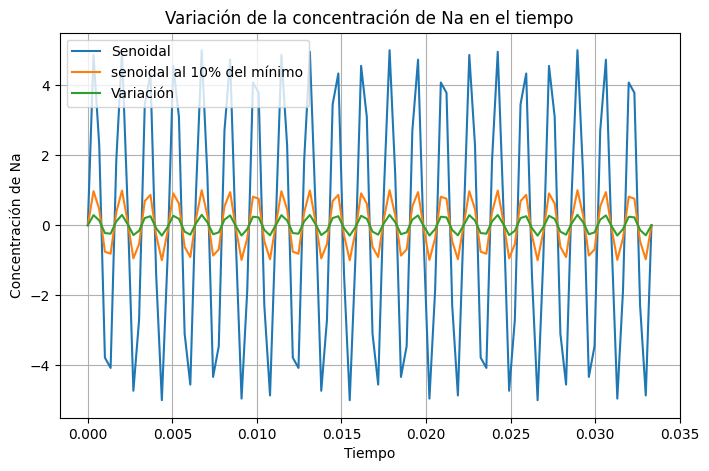

In [29]:
# Variación sinoidal del 10% del valor mínimo de concentración iónica
min = 50  # valor mínimo
var = 0.1 * min  # variación del 10%
Sen = np.sin(2 * np.pi * f * t /T)
Vin = var * Sen
VNa = ENa * Vin

plt.figure(figsize=(8, 5))

plt.plot(t, Vin, label='Senoidal') # Estan volteadas porque se imprimen mal los label
plt.plot(t, Sen, label='senoidal al 10% del mínimo')
plt.plot(t, VNa, label='Variación')

# Configuraciones de la gráfica
plt.xlabel('Tiempo')
plt.ylabel('Concentración de Na')
plt.title('Variación de la concentración de Na en el tiempo')
plt.legend()
plt.grid(True)
plt.show()